<a href="https://colab.research.google.com/github/javiera-ari/javiera./blob/main/PROYECTO_FINAL_ML_MP2.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning

*Proyecto Final – Calidad del Aire en Curicó*

---

El objetivo de esta ejecución es desarrollar un proyecto de Machine Learning completo, considerando la extracción de los datos, transformación, implementación de modelos de pronóstico, y validación.

El enfoque del proyecto es trabajar en un tema de contaminación ambiental dentro de la ciudad de Curicó. Considerando que el SINCA tiene estaciones de monitoreo de material particulado grueso (MP 2,5) a lo largo del país y a su vez genera una base de dato con datos históricos de la calidad del aire y meteorología. Por este motivo se utiliza la base de dato del MP2,5 entregada de manera on-line por el SINCA.

*Dentro del proyecto se observará:*
  1. Entrenamiento del modelo en horas
  2. Entrenamiento del modelo en días
  3. Conclusiones


## Herramientas de Python

In [ ]:
import IPython.core.display
import matplotlib ## paquete necesario para poder hacer gráficas

def apply_styles(): ### especificamos los parámetros para los gráficos
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles() ### finalmente aplicamos el estilo

In [ ]:
### éstos elementos configuran fuente tamaño color de la letra porcentaje etc.
%%html
<style type="text/css">
@import url('https://fonts.googleapis.com/css?family=Playfair+Display');


div.text_cell_render {font-family: 'Playfair Display', serif; color: #13213b; line-height: 145%; font-size:16px;}
</style>

## Parte 1. Entrenamiento del modelo [horas]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [ ]:
import warnings 
## desactivar mensajes para ciertos advertencias en las funciones
warnings.filterwarnings('ignore')

Cargue los datos de calidad del aire de Curicó de manera automatica del SINCA por medio de un script en Python.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

URL="https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath="


In [ ]:
#Se visualizan los datos de la base de datos 
item=['FECHA (YYMMDD)','HORA (HHMM)','Registros validados','Registros preliminares','Registros no validados']
data=pd.read_csv(URL,sep=";",decimal=",",usecols=item)
print(data)
data.head()

       FECHA (YYMMDD)  ...  Registros no validados
0              120707  ...                     NaN
1              120707  ...                     NaN
2              120707  ...                     NaN
3              120707  ...                     NaN
4              120707  ...                     NaN
...               ...  ...                     ...
82410          211130  ...                     NaN
82411          211130  ...                     NaN
82412          211130  ...                     NaN
82413          211130  ...                     NaN
82414          211130  ...                     NaN

[82415 rows x 5 columns]


,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados
0,120707,100,NaN,NaN,NaN
1,120707,200,NaN,NaN,NaN
2,120707,300,NaN,NaN,NaN
3,120707,400,NaN,NaN,NaN
4,120707,500,NaN,NaN,NaN


In [ ]:
#visualización del tipo de datos dentro de la base de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FECHA (YYMMDD)          82415 non-null  int64  
 1   HORA (HHMM)             82415 non-null  int64  
 2   Registros validados     57743 non-null  float64
 3   Registros preliminares  16484 non-null  float64
 4   Registros no validados  2743 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 3.1 MB


In [ ]:
#Transformación del formato de "FECHA (YYMMDD)" en nueva columna "date" en tipo "datetime64[ns]" 
data['date']=pd.to_datetime(data['FECHA (YYMMDD)'],format="%y%m%d")
#Transformación del formato de "HORA (HHMM)" en nueva columna "hour" en tipo "object"
data['hour']=pd.to_datetime(data['HORA (HHMM)'].astype(str).str.zfill(4),format="%H%M")
data['hour'] = data['hour'].dt.strftime("%H:%M:%S")
print(data)
data.head()

       FECHA (YYMMDD)  HORA (HHMM)  ...       date      hour
0              120707          100  ... 2012-07-07  01:00:00
1              120707          200  ... 2012-07-07  02:00:00
2              120707          300  ... 2012-07-07  03:00:00
3              120707          400  ... 2012-07-07  04:00:00
4              120707          500  ... 2012-07-07  05:00:00
...               ...          ...  ...        ...       ...
82410          211130         1900  ... 2021-11-30  19:00:00
82411          211130         2000  ... 2021-11-30  20:00:00
82412          211130         2100  ... 2021-11-30  21:00:00
82413          211130         2200  ... 2021-11-30  22:00:00
82414          211130         2300  ... 2021-11-30  23:00:00

[82415 rows x 7 columns]


,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,date,hour
0,120707,100,NaN,NaN,NaN,2012-07-07,01:00:00
1,120707,200,NaN,NaN,NaN,2012-07-07,02:00:00
2,120707,300,NaN,NaN,NaN,2012-07-07,03:00:00
3,120707,400,NaN,NaN,NaN,2012-07-07,04:00:00
4,120707,500,NaN,NaN,NaN,2012-07-07,05:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82415 entries, 0 to 82414
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FECHA (YYMMDD)          82415 non-null  int64         
 1   HORA (HHMM)             82415 non-null  int64         
 2   Registros validados     57743 non-null  float64       
 3   Registros preliminares  16484 non-null  float64       
 4   Registros no validados  2743 non-null   float64       
 5   date                    82415 non-null  datetime64[ns]
 6   hour                    82415 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 4.4+ MB


Unión de la fecha y la hora para generar unidades de tiempo estándar en python.

In [ ]:
data['period'] = pd.to_datetime(data.pop('date')) + pd.to_timedelta(data.pop('hour'))
print(data)
data.head(5)

       FECHA (YYMMDD)  HORA (HHMM)  ...  Registros no validados              period
0              120707          100  ...                     NaN 2012-07-07 01:00:00
1              120707          200  ...                     NaN 2012-07-07 02:00:00
2              120707          300  ...                     NaN 2012-07-07 03:00:00
3              120707          400  ...                     NaN 2012-07-07 04:00:00
4              120707          500  ...                     NaN 2012-07-07 05:00:00
...               ...          ...  ...                     ...                 ...
82410          211130         1900  ...                     NaN 2021-11-30 19:00:00
82411          211130         2000  ...                     NaN 2021-11-30 20:00:00
82412          211130         2100  ...                     NaN 2021-11-30 21:00:00
82413          211130         2200  ...                     NaN 2021-11-30 22:00:00
82414          211130         2300  ...                     NaN 2021-11-30 2

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period
0,120707,100,NaN,NaN,NaN,2012-07-07 01:00:00
1,120707,200,NaN,NaN,NaN,2012-07-07 02:00:00
2,120707,300,NaN,NaN,NaN,2012-07-07 03:00:00
3,120707,400,NaN,NaN,NaN,2012-07-07 04:00:00
4,120707,500,NaN,NaN,NaN,2012-07-07 05:00:00


In [ ]:
#Gráfico para visualizar donde estan los datos 
#sns.heatmap(data.isnull(), cbar="YlGnBu")

In [ ]:
import pandas as pd
import numpy as np
df=pd.DataFrame(data)
#Se reemplazan los datos NaN por "0"
df['Registros validados'].fillna(0, inplace = True)
df['Registros preliminares'].fillna(0, inplace = True)
df['Registros no validados'].fillna(0, inplace = True)

df.head(5)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period
0,120707,100,0.0,0.0,0.0,2012-07-07 01:00:00
1,120707,200,0.0,0.0,0.0,2012-07-07 02:00:00
2,120707,300,0.0,0.0,0.0,2012-07-07 03:00:00
3,120707,400,0.0,0.0,0.0,2012-07-07 04:00:00
4,120707,500,0.0,0.0,0.0,2012-07-07 05:00:00


In [ ]:
#df.shape

In [ ]:
#Se genera una nueva columna denominada "Registros" con los datos obtenidos al unir la columna de "Registros validados", "Registros preliminares"
# y de "Registros no validados"
df['Registros'] = df.iloc[:,2]+df.iloc[:,3]+df.iloc[:,4]
df.head(5)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period,Registros
0,120707,100,0.0,0.0,0.0,2012-07-07 01:00:00,0.0
1,120707,200,0.0,0.0,0.0,2012-07-07 02:00:00,0.0
2,120707,300,0.0,0.0,0.0,2012-07-07 03:00:00,0.0
3,120707,400,0.0,0.0,0.0,2012-07-07 04:00:00,0.0
4,120707,500,0.0,0.0,0.0,2012-07-07 05:00:00,0.0


In [ ]:
#eliminar columnas que no se utilizaran, dejando el periodo y el registro de contaminación 
df.drop(['FECHA (YYMMDD)', 'HORA (HHMM)', 'Registros validados','Registros preliminares','Registros no validados'], axis=1)

,period,Registros
0,2012-07-07 01:00:00,0.0
1,2012-07-07 02:00:00,0.0
2,2012-07-07 03:00:00,0.0
3,2012-07-07 04:00:00,0.0
4,2012-07-07 05:00:00,0.0
...,...,...
82410,2021-11-30 19:00:00,3.0
82411,2021-11-30 20:00:00,7.0
82412,2021-11-30 21:00:00,7.0
82413,2021-11-30 22:00:00,11.0


Se opta por el metodo de **imputación simple** más tradicional donde los datos faltantes (0) se reemplazarán por el promedio de los datos de contaminación entregados por el SINCA (**método de medias no condicionadas**)



In [ ]:
#Cálculo de promedio del registro de contaminación ambiental
promedio=df['Registros'].mean()
promedio

29.376455066734103

In [ ]:
#Reemplazar los datos faltantes por el promedio
#df.loc[df.Registros<=0,'Registros']=promedio

In [ ]:
#import matplotlib.pyplot as mplt
#import seaborn as sbn
#fig, ax = plt.subplots(figsize=(18,6))
#df.plot(x="period", y="Registros", ax=ax, label="train")
#plt.legend(loc='upper left')
#plt.savefig('images/prophet-forecast-testrange.png')
#plt.show();

En la sesión anterior comentada, se graficaron los registros y en el año 2012 se ven alteraciones drasticas, debido a que hay mucha falta de datos y estos al reemplazarse por el promedio complican la predicción por lo mismo se optó por eliminar los registros de ese año aunque se sigue considernado el 2014 a pesar de la existencia de varios datos faltantes en horas

In [ ]:
df=df.drop(df[df['FECHA (YYMMDD)']<130301].index)
#Reemplazo de datos faltantes por el promedio
df.loc[df.Registros<=0,'Registros']=promedio
print(df)

       FECHA (YYMMDD)  HORA (HHMM)  ...              period  Registros
5687           130301            0  ... 2013-03-01 00:00:00        6.0
5688           130301          100  ... 2013-03-01 01:00:00        3.0
5689           130301          200  ... 2013-03-01 02:00:00        4.0
5690           130301          300  ... 2013-03-01 03:00:00        4.0
5691           130301          400  ... 2013-03-01 04:00:00        2.0
...               ...          ...  ...                 ...        ...
82410          211130         1900  ... 2021-11-30 19:00:00        3.0
82411          211130         2000  ... 2021-11-30 20:00:00        7.0
82412          211130         2100  ... 2021-11-30 21:00:00        7.0
82413          211130         2200  ... 2021-11-30 22:00:00       11.0
82414          211130         2300  ... 2021-11-30 23:00:00        7.0

[76728 rows x 7 columns]


Gráfico de la serie de tiempo donde se indica los índices de contaminación a través de las horas registradas.

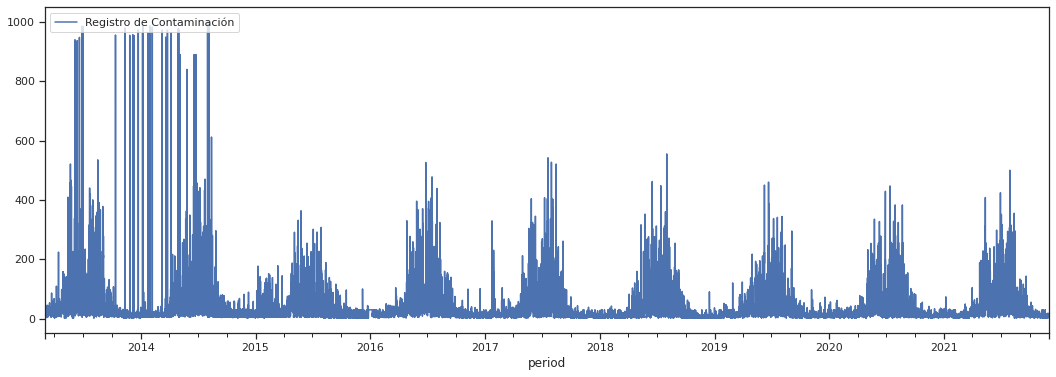

In [ ]:
#ploteo de gráfico desde el año 2013 - 2021
import matplotlib.pyplot as mplt
import seaborn as sbn
fig, ax = plt.subplots(figsize=(18,6))
df.plot(x='period', y='Registros', ax=ax, label='Registro de Contaminación')
plt.legend(loc='upper left')

#Las imágenes generadas se guardan en la carpeta de 'images'
plt.savefig('images/prophet-forecast-testrange.png')


En el gráfico anterior se ve como el año 2014 tiene unas alzas constantes y se justifica por el metodo de imputación utilizado, donde aquellos datos que no se encontraron se reemplazaron por el promedio de la contaminación 

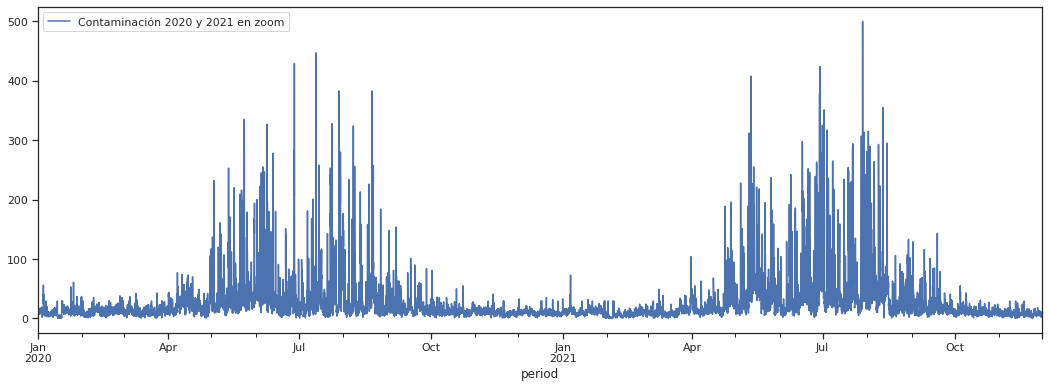

In [ ]:
# hacemos una sección de los datos para analizar de cerca lo que pasa en dos años 2020-2021
zoom_range = df[(df.period >= '2020-01-01') & (df.period < '2022-01-01')].index

fig, ax = plt.subplots(figsize=(18,6)) #dimensiones del gráfico
df.loc[zoom_range].plot(x="period", y="Registros", ax=ax, label="Contaminación 2020 y 2021 en zoom") #el gráfico en sí pero considerando el zoom de datos
plt.legend(loc='upper left') #cambiamos la posición por defecto de la leyenda

plt.savefig('images/intro-zoom.png'); #recuerda crear la carpeta 'images'

Separación de los datos en conjuntos de entrenamiento y validación, en el contexto de pronóstico en series de tiempo. 

Para comenzar se calculan los elementos centrales de el análisis de predicción: 1) Seasonality, 2) Trend y 3) Resid


In [ ]:
#Del paquete statmodel se obtiene un modelo para hacer descomposición de estacionalidad 
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("period").Registros.interpolate("linear"),
    freq=decompfreq,
    model=model)

In [ ]:
#Aquí obtenemos los resultados de la descomposición, en términos de tendencia, estacionalidad y residuos
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

Realización de los gráficos

**Trend**


---



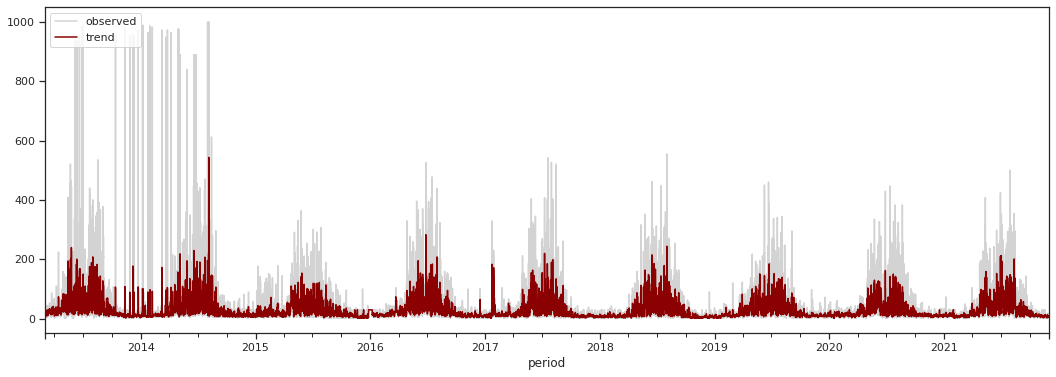

In [ ]:
#Graficar la tendencia
fig, ax = plt.subplots(figsize=(18,6))
#grafico original
df.plot(x="period", y="Registros", ax=ax, label="observed", c='lightgrey')
#grafico de la tendencia
trend.plot(ax=ax, label="trend", color="darkred") ## si se fijan aquí se está utilizando el objeto 'trend'
plt.legend(loc='upper left')

plt.savefig('images/intro-trend.png');

En el gráfico anterior se puede observar el decremento en las series en el tiempo 

**Seasonality**


---

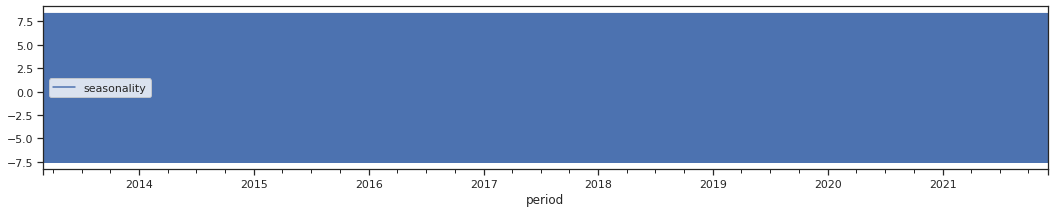

In [ ]:
#Graficar la estacionalidad
fig, ax = plt.subplots(figsize=(18,3)) ## aquí indicamos las proporciones del gráfico, que en este caso se hace un poco más delgados
seasonal.plot(ax=ax, label="seasonality") # aquí se usa el objeto seasonal que se obtuvo los pasos anteriores
plt.legend(loc='bottom left')

plt.savefig('images/intro-seasonality.png');

En el gráfico anterior se muestra un patron regular constante donde solo se aprecia la amplitud

**Residual**


---

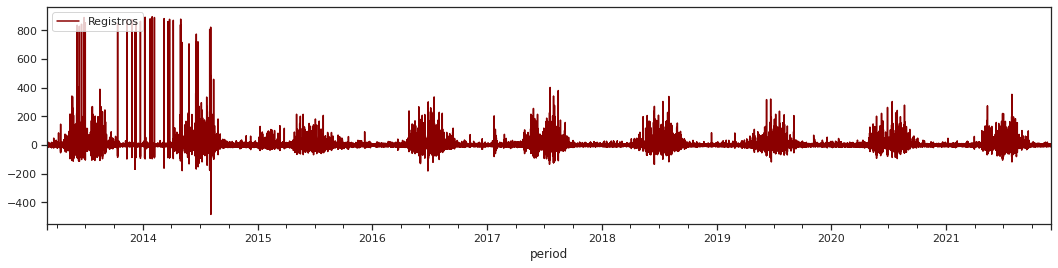

In [ ]:
## finalmente gráfica vamos los elementos residuales
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, legend="seasonality", color="darkred") ## Y se utiliza el objeto residual que se obtuvo en la descomposición de la serie
plt.legend(loc='upper left')

plt.savefig('images/intro-residual.png');

Ahora si se ejecuta la separación de los datos en conjuntos de entrenamiento y validación.
Aquí se considera razonable una validación en un rango de dos años (los dos últimos), debido a lo obervado y utilizado en otras revisiones bibliograficas de proyectos de investigación.

In [ ]:
import numpy as np
#rango de entrenamiento hasta el 2019
train_range = df[df.period < '2019-01-01'].index
#rando de validación desde el 2015 en adelante
test_range = df[(df.period >= '2019-01-01')].index

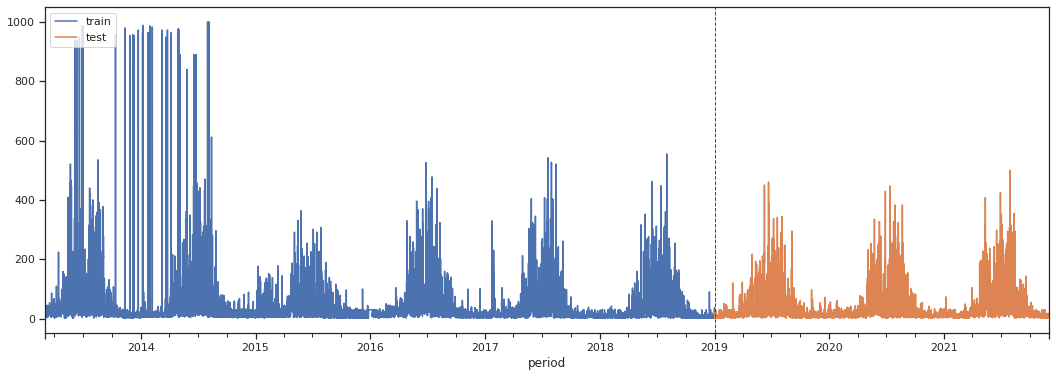

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
#los indices del entregamiento 
df.loc[train_range].plot(x="period", y="Registros", ax=ax, label="train")
#los indices del test de validacion 
df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="test")

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')

plt.savefig('images/prophet-split.png'); 

Entrenamiento con el modelo Prophet para realizar pronóstico.



In [ ]:
from fbprophet import Prophet

In [ ]:
#datos de entrenamiento
df_prophet_train = df.loc[train_range][["period", "Registros"]]
df_prophet_train.columns = ["ds", "y"]
#alimentando el modelo prophet
#consideramos estacionalidad anual
model = Prophet(
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False, 
    mcmc_samples=12, 
    growth='linear',
    interval_width=0.9)

In [ ]:
model.fit(df_prophet_train);

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Hacer predicción

In [ ]:
#tomamos los datos de test para hacer predicciones sobre esos datos
df_prophet_test = df.loc[test_range][["period", "Registros"]]
df_prophet_test.columns = ["ds", "y"]

#modelo de "forecast" "predict", predice con los datos de test
forecast = model.predict(df_prophet_test[['ds']])
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')

yhat_test = forecast.yhat.values
y_test = df.loc[test_range].Registros.values

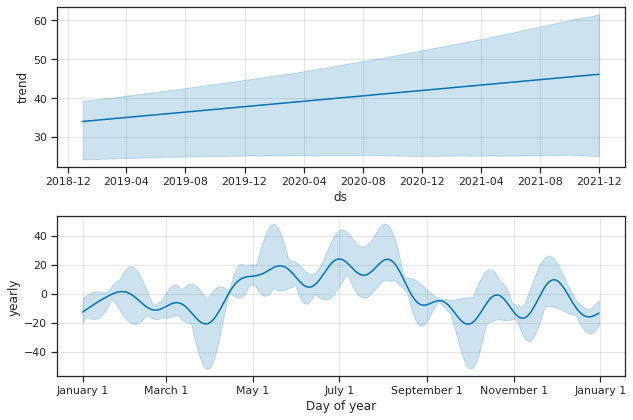

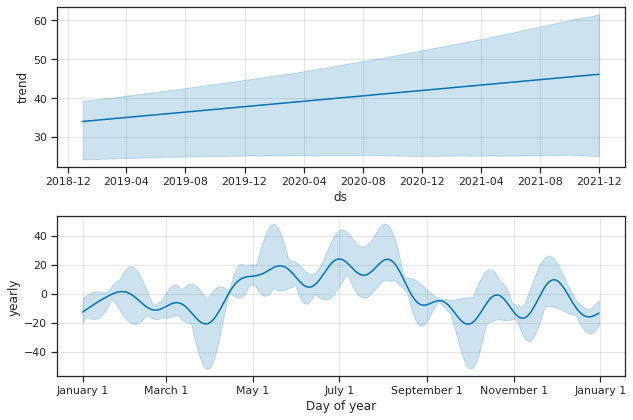

In [ ]:
#Obtención de tendencia incrementando en los años en 'ds' y 'day of year'
model.plot_components(forecast)

Representación de la contaminación obervada y predecida en los dos últimos años.

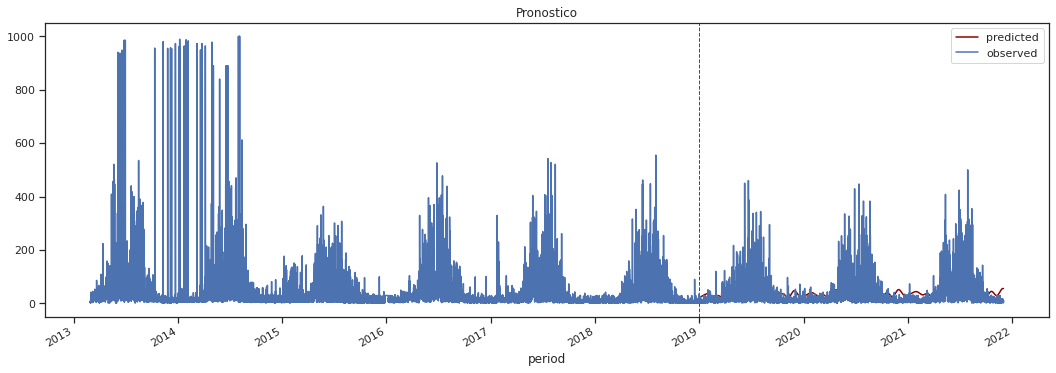

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="darkred", label="predicted")

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
df.plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Pronostico')

plt.savefig('images/prophet-forecast-testrange.png')

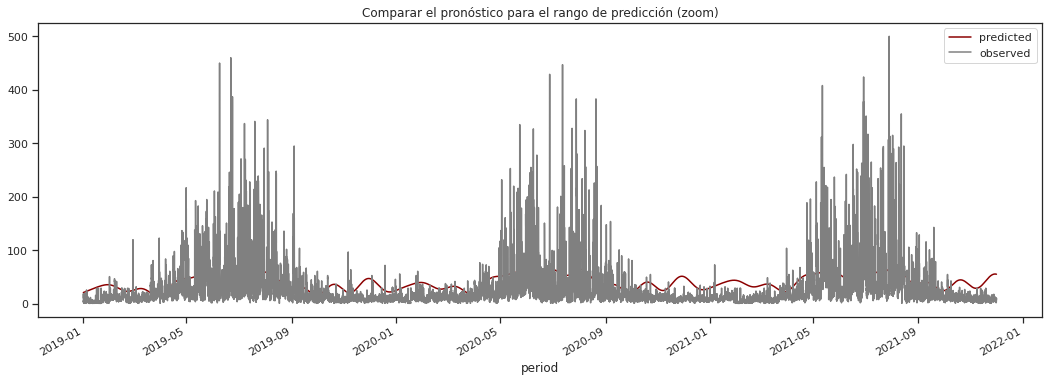

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="darkred", label="predicted")

df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed",color="grey")
plt.legend(loc='best')
plt.title('Comparar el pronóstico para el rango de predicción (zoom)')


plt.savefig('images/prophet-forecast-testrange-zoom.png')
plt.show();

Intervalo de confianza

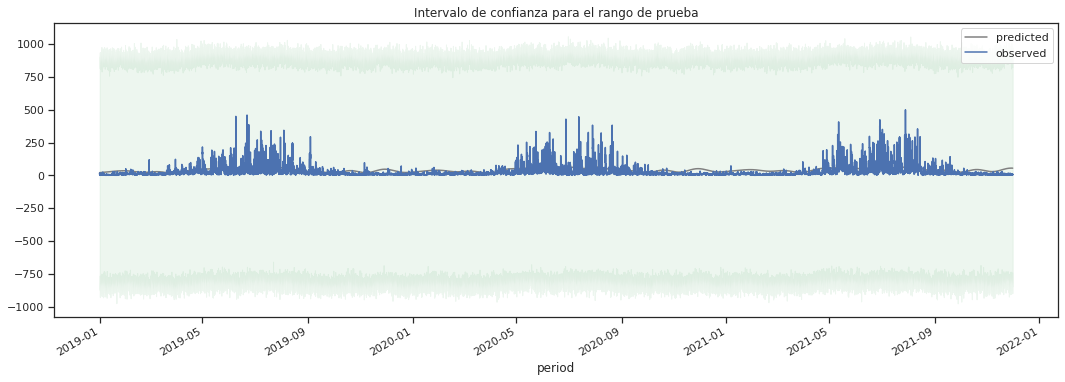

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="grey", label="predicted")

ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    forecast_ci['yhat_lower'],
    forecast_ci['yhat_upper'],
    color='g',
    alpha=0.1)

df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Intervalo de confianza para el rango de prueba')

plt.savefig('images/prophet-forecast-testrange-confidence-interval.png')
plt.show();

Evaluar el pronóstico

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def theils_u_metric(y_true, y_pred):

  #medidas de desempeño que necesitamos calcular 
    """Calculate Theil's U statistics using observed and predicted vectors."""
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [ ]:
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)
mape = mean_absolute_percentage_error(y_test, yhat_test)*100

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))
print("MAPE (test): {:0.0f} %".format(mape))

MAE (test): 26
MSE (test): 1212
R2  (test): -0.046
U   (test): 0.019505
MAPE (test): 277 %


## Parte 2. Entrenamiento del modelo [días]

El primer paso es agrupar los registros de contaminación en días, para este proceso se utiliza *groupby* con la frecuencia representada con la letra **'D'** (días).

In [ ]:
df_day=df.groupby(pd.Grouper(key='period',freq='D')).mean().reset_index() 

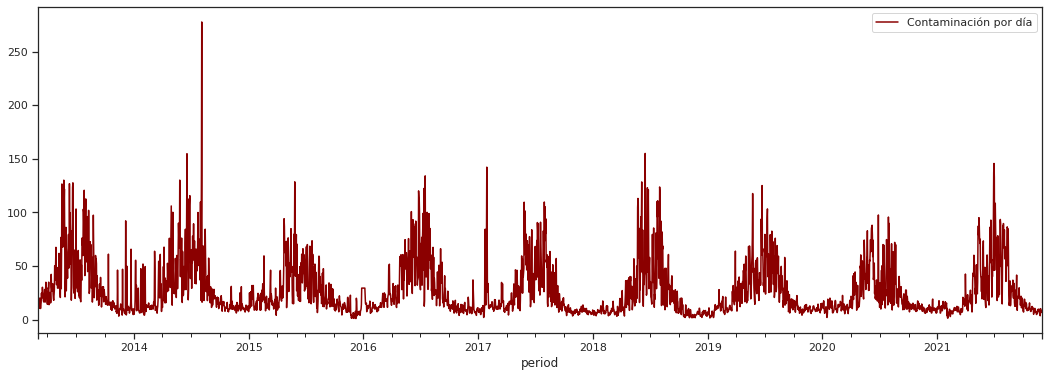

In [ ]:
fig, ax = plt.subplots(figsize=(18,6)) 
df_day.plot(x="period", y="Registros", ax=ax, color='darkred')
plt.legend(['Contaminación por día'])
plt.savefig('visualization-dia.png'); 

Separación de los datos en conjuntos de entrenamiento y validación, en el contexto de pronóstico en series de tiempo. 

Para comenzar se calculan los elementos centrales de el análisis de predicción: 1) Seasonality, 2) Trend y 3) Resid

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(
    df_day.set_index("period").Registros.interpolate("linear"),
    freq=decompfreq,
    model=model)

In [ ]:
## aquí obtenemos los resultados de la descomposición, en términos de tendencia, estacionalidad y residuos
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

Realización de los gráficos

**Trend**


---

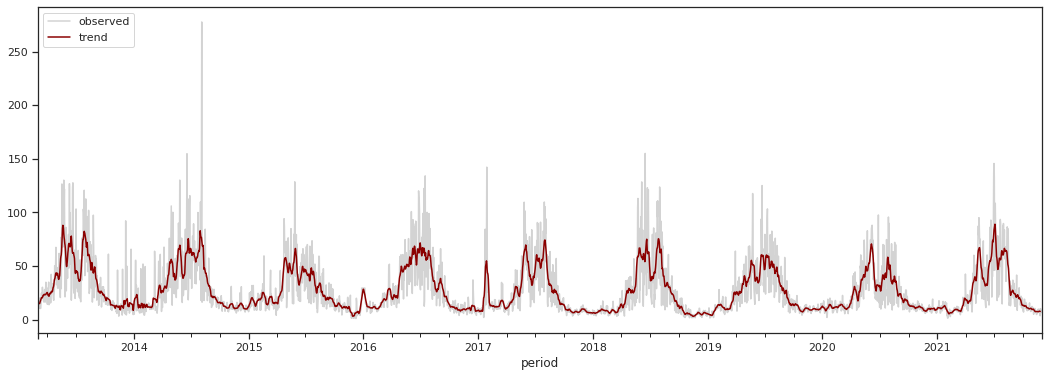

In [ ]:
## ahora se realizan los gráficos uno a uno comenzando por la tendencia
fig, ax = plt.subplots(figsize=(18,6))
#grafico original
df_day.plot(x="period", y="Registros", ax=ax, label="observed", c='lightgrey')
#grafico de la tendencia
trend.plot(ax=ax, label="trend", color="darkred") ## si se fijan aquí se está utilizando el objeto 'trend'
plt.legend(loc='upper left')

plt.savefig('images/intro-trend-DAY.png');


**Seasonality**


---

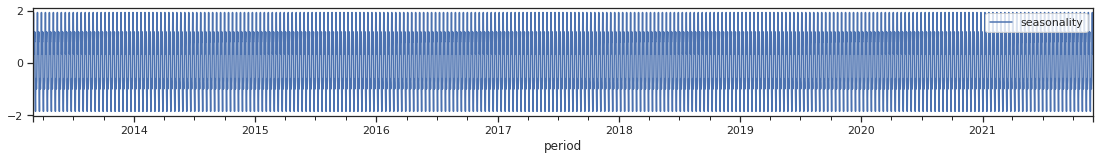

In [ ]:
## ahora es el turno de graficar la estacionalidad
fig, ax = plt.subplots(figsize=(19,2)) ## aquí indicamos las proporciones del gráfico, que en este caso se hace un poco más delgados
seasonal.plot(ax=ax, label="seasonality") # aquí se usa el objeto seasonal que se obtuvo los pasos anteriores
plt.legend(loc='bottom left')

plt.savefig('images/intro-seasonality-DAY.png');

En el gráfico anterior se muestra un patron regular constante donde ahora si se aprecia la amplitud

**Residual**


---

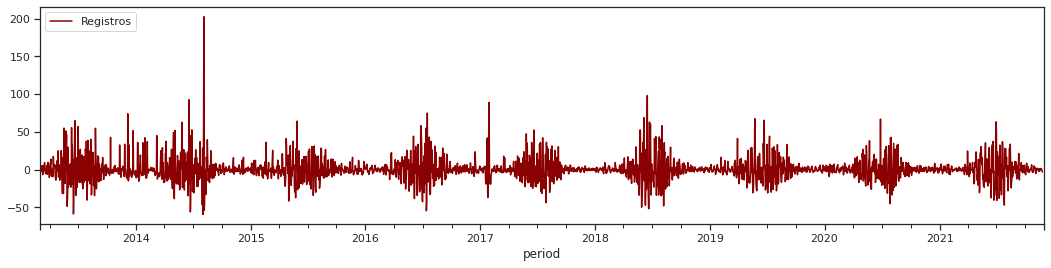

In [ ]:
## finalmente gráfica vamos los elementos residuales
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, legend="seasonality", color="darkred") ## Y se utiliza el objeto residual que se obtuvo en la descomposición de la serie
plt.legend(loc='upper left')

plt.savefig('intro-residual.png');

Ahora si se ejecuta la separación de los datos en conjuntos de entrenamiento y validación.
Aquí se considera razonable una validación en un rango de dos años (los dos últimos), debido a lo obervado y utilizado en otras revisiones bibliograficas de proyectos de investigación.

In [ ]:
import numpy as np
# Separación entre datos de entrenamiento y de validación, se debe considerar de forma continua al ser series de tiempo
train_range = df_day[df_day.period < '2019-01-01'].index
test_range = df_day[(df_day.period >= '2019-01-02')].index

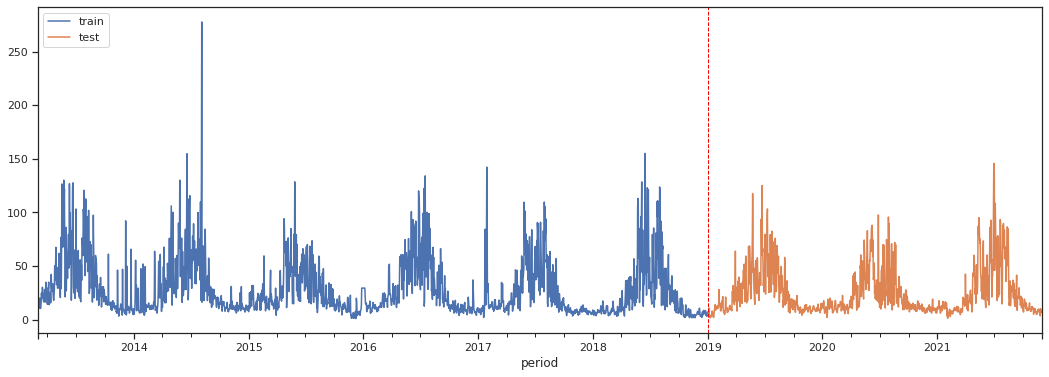

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
df_day.loc[train_range].plot(x="period", y="Registros", ax=ax, label="train")
df_day.loc[test_range].plot(x="period", y="Registros", ax=ax, label="test")

plt.axvline(pd.to_datetime(str(df_day.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
plt.legend(loc='upper left')

plt.savefig('prophet-split.png'); ## recuerda crear la carpeta images si trabajas con Google Colab

Entrenamiento con el modelo Prophet para realizar pronóstico.

In [ ]:
from fbprophet import Prophet

In [ ]:
#datos de entrenamiento
df_prophet_train = df_day.loc[train_range][["period", "Registros"]]
df_prophet_train.columns = ["ds", "y"]
#alimentando el modelo prophet
#consideramos estacionalidad anual, 
model = Prophet(
    yearly_seasonality=True, #verano aire mas limpio
    weekly_seasonality=False, #fds mas contaminados
    daily_seasonality=False, #menos contaminacion a las 15:00-14:00
    #changepoints=list(changepoints.keys()),
    #holidays=df_holidays,
    mcmc_samples=12, #jugar con este valor de frecuencia porque esto esta en 12 meses
    growth='linear',
    interval_width=0.9)


In [ ]:
model.fit(df_prophet_train);

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Hacer predicción DAY

In [ ]:
#tomamos los datos de test para hacer predicciones sobre esos datos
df_prophet_test = df_day.loc[test_range][["period", "Registros"]]
df_prophet_test.columns = ["ds", "y"]

#modelo de "forecast" "predict", predice con los datos de test
forecast = model.predict(df_prophet_test[['ds']])
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')

yhat_test = forecast.yhat.values
y_test = df_day.loc[test_range].Registros.values

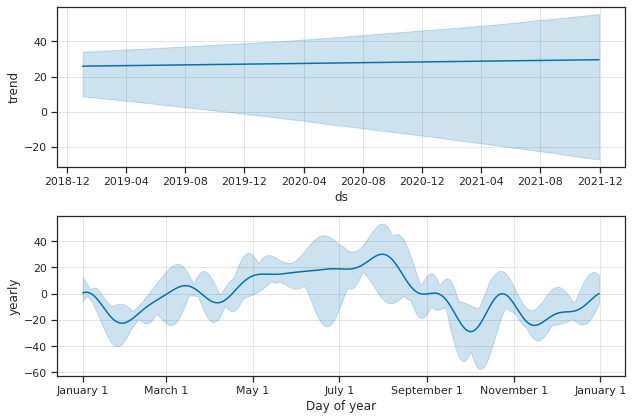

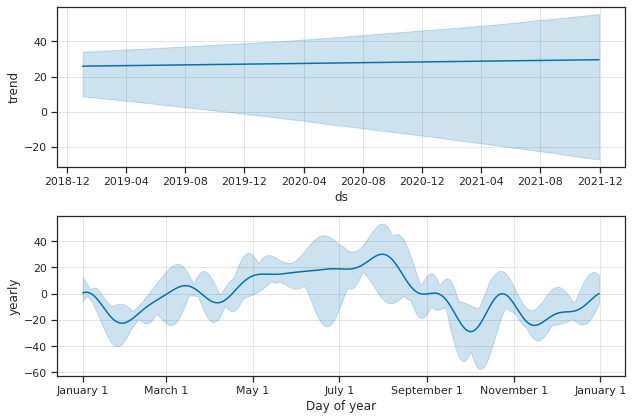

In [ ]:
model.plot_components(forecast)

Representación de la contaminación obervada y predecida en los dos últimos años.

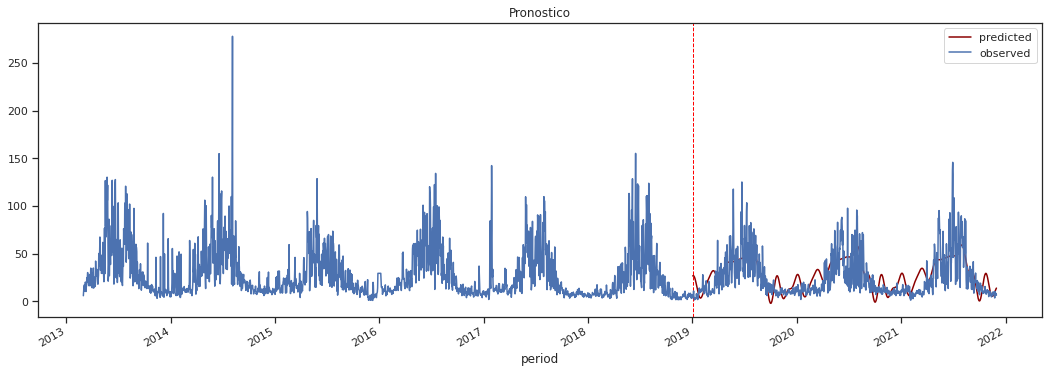

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df_day.loc[test_range].period.values), yhat_test,
        color="darkred", label="predicted")

plt.axvline(pd.to_datetime(str(df_day.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
df_day.plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Pronostico')

plt.savefig('images/prophet-forecast-testrange-DAY.png')
plt.show();


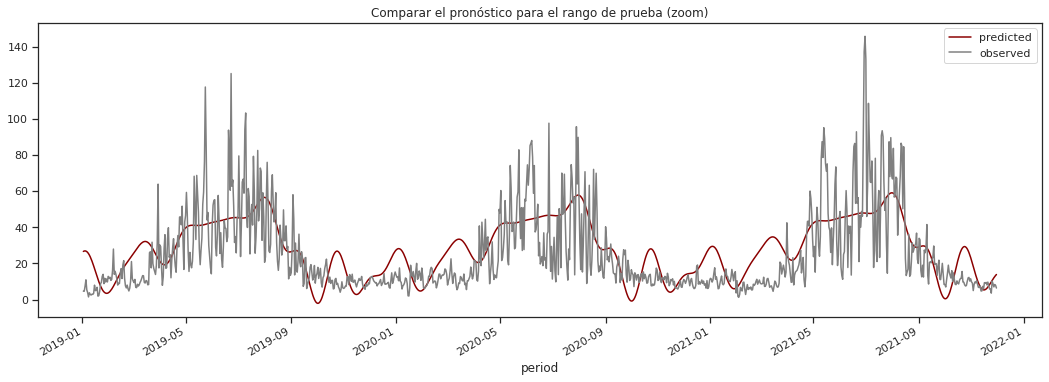

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df_day.loc[test_range].period.values), yhat_test,
        color="darkred", label="predicted")

df_day.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed",color="grey")
plt.legend(loc='best')
plt.title('Comparar el pronóstico para el rango de prueba (zoom)')


plt.savefig('images/prophet-forecast-testrange-zoom.png')
plt.show();

Intervalo de confianza

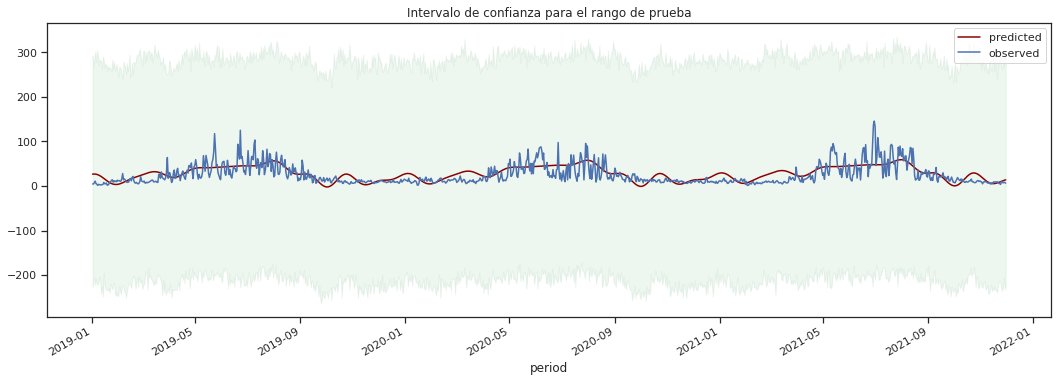

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df_day.loc[test_range].period.values), yhat_test,
        color="darkred", label="predicted")

ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    forecast_ci['yhat_lower'],
    forecast_ci['yhat_upper'],
    color='g',
    alpha=0.1)

df_day.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Intervalo de confianza para el rango de prueba')

plt.savefig('images/prophet-forecast-testrange-confidence-interval.png')
plt.show();

Evaluate the forecast DAY

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def theils_u_metric(y_true, y_pred):

  #medidas de desempeño que necesitamos calcular 
    """Calculate Theil's U statistics using observed and predicted vectors."""
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [ ]:
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)
mape = mean_absolute_percentage_error(y_test, yhat_test)*100

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))
print("MAPE (test): {:0.0f} %".format(mape))

MAE (test): 13
MSE (test): 288
R2  (test): 0.410
U   (test): 0.015971
MAPE (test): 91 %


##Conclusiones

Primero hay que considerar que se hicieron dos evaluaciones del mismo método pero con diferente rango de tiempo, primero se ejecuto un entrenamiento del modelo en base a las horas monitoreadas y en segundo lugar se agruparon dichas horas en días para terner otros datos de entregamiento del modelo. Así en base a calculo las Métricas de regresión en aprendizaje automatico evaluar el comportamiento y concluir cual de las dos decisiones fue mejor. 


---



**Métricas de regresión en aprendizaje automatico [horas]**

*   MAE (test): 26
*   MSE (test): 1212
*   R2  (test): -0.046
*   U   (test): 0.019505
*   MAPE (test): 277 %

**Métricas de regresión en aprendizaje automatico [días]**
*   MAE (test): 13
*   MSE (test): 288
*   R2  (test): 0.410
*   U   (test): 0.015971
*   MAPE (test): 91 %

#**Comparación de métricas de regresión**

1.   Las métricas MAE y MSE son un promedio, lo que les distingue es que MAE calcula el valor absoluto de la diferencia entre la salida de un modelo y el valor esperado, mientras que MSE calcula el cuadrado de esa diferencia. Esto hace que MAE sea una métrica más sencilla que genera un valor directo del error en las estimaciones, pero como promedio oculta información. En cambio, MSE al emplear un exponente amplifica errores más grandes, impidiendo que pasen desapercibidos al calcularse el promedio.
*Considerando esto se puede concluir que el entregamiento ejecutado por hora cuenta con un MSE mas alto, implicando que el modelo sea peor, pero  es difícil darse cuenta si nuestro modelo es bueno o no al observar los valores absolutos de MSE o RMSE*

2.   El coeficiente de determinación o R², es otra medida que podemos usar para evaluar un modelo y está relacionada con la MSE, pero es libre de escala, no importa si Los valores de salida son muy grandes o muy pequeños, el R² siempre estará entre -∞ y 1. Cuando R² es negativo, significa que el modelo es peor que predecir la media y a su vez mientras se encuentre más cercano el valor a 1 indicaría que no hay error en las estimaciones.
*Considerando esta información sonre el R² el modelo de entrenamiento por día obtiene mejor desempeño con un valor de 0.41 a pesar de no estar cercano a 1, el otro resultado de dicho coeficiente es negativo.*

3.   Por otro lado el MAPE entrega la desviación en términos porcentuales y no en unidades como las anteriores medidas. Es el promedio del error absoluto o diferencia entre la demanda real y el pronóstico, expresado como un porcentaje de los valores reales.
*Considerando esta definición se concluye que el entregamiento por horas presenta un porcentaje más elevado que el calculdo por días, por ende el comportamiento por día presenta mejor desempeño*



---



También hay que considerar que la base de dato de concentracion de contaminantes de MP2,5 entregada por el SINCA debe tener un trabajo detallado y exhaustivo de preprocesamiento de datos, ya que podria mejorar considerablemente los resultados de la predicción. 


---



*Es recomendable terminar con la idea original del proyecto y realizar el pronóstico con el modelo neuronal Long short term memory (LSTM) y así poder comparar el desempeño de ambos modelos*